# Algebra lineal con **SciPy**

Referencias:

- https://docs.scipy.org/doc/scipy/reference/linalg.html
- https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.


In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Inversa de una matriz

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

**1)** Use `linalg.inv()` para calcular la inversa $A^{-1}$ de la matriz

\begin{equation}
A = \bigg(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\bigg)
\end{equation}

**2)** Use `np.dot()` para chequear que $A^{-1}A \approx \mathbb{I}$, donde $\mathbb{I}$ es la matriz identidad.

**3)** Chequee que $AA^{-1} \approx \mathbb{I}$.


In [2]:
A = np.array([[1, 2], [3, 4]])
A_inv = linalg.inv(A)
print("Inversa de A:")
print(A_inv)


# 2.2)

I_approx1 = np.dot(A_inv, A)
print("\nProducto A_inv * A (debería ser la identidad):")
print(I_approx1)

# 2.3)
I_approx2 = np.dot(A, A_inv)
print("\nProducto A * A_inv (debería ser la identidad):")
print(I_approx2)

Inversa de A:
[[-2.   1. ]
 [ 1.5 -0.5]]

Producto A_inv * A (debería ser la identidad):
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]

Producto A * A_inv (debería ser la identidad):
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


## **Ejercicio 3)** Sistema de ecuaciones lineales

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

**1)** Use `linalg.solve()` para resolver el sistema $Ax=b$ donde, $x$ es la incógnita,

\begin{equation}
A = \left(
\begin{array}{cc}
3 & 2 & 0 \\
1 & -1 & 0 \\
0 & 5 & 1
\end{array}
\right)
\end{equation}

y

\begin{equation}
b = \left(
\begin{array}{cc}
2 \\
4 \\
1
\end{array}
\right)
\end{equation}

**2)** Chequee que $Ax=b$.


In [7]:
# 3.1)

A = np.array([[3, 2, 0], [1, -1 , 0], [0, 5, 1]])
b = np.array([2, 4, 1])

x = linalg.solve(A, b)
print("\nSolución del sistema Ax = b:")
print(x)

# 3.2)
print("Chequeo de la solución: ")
print(np.allclose(np.dot(A, x), b))  # Debería ser True


Solución del sistema Ax = b:
[ 2. -2. 11.]
Chequeo de la solución: 
True


## **Ejercicio 4)** Cuadrados mínimos

Dada una matriz $X$ de dimensiones $n\times m$ y un vector $y$ de dimensión $n$, la función `linalg.lstsq(X,y,...)` se usa para encontrar el vector $y$ de dimensión $m$ que minimize la norma L2 dada por $|y-Xc|$ con respecto al vector $c$ de dimensión $m$. Notar que minimizar esta cantidad no necesariamente implica que $Xc=y$. Minimizar $|y-Xc|$ es útil para infinidad de problemas. En particular, es útil para ajustar polinomios a curvas obtenidas de datos.

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

**1)** Use `linalg.lstsq(X,y)` para encontrar los coeficientes $c_0$, $c_1$ y $c_2$ del polinomio $p(x)=c_0+c_1x+c_2x^2$ que ajuste lo mejor posible los siguientes datos

    x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
    y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

de acuerdo al método de cuadrados mínimos

\begin{eqnarray}
\min\_{c_0,c_1,c_2} \sum_i (y_i-p(x_i))^2
\end{eqnarray}

**Ayuda:** Utilizar la matriz $X$ de entradas $X_{ij}=x_i^j$, i.e. la $j$-ésima potencia de $x_i$.

**2)** Con el fin de evaluar la bondad del ajuste, grafique en una misma figura:

- con símbolos los puntos $(x_i,y_i)$, y
- con una curva el polinomio ajustado $p(x)$ vs $x$.


Coeficientes del polinomio ajustado:
[0.0578403  0.07701453 0.11262261]


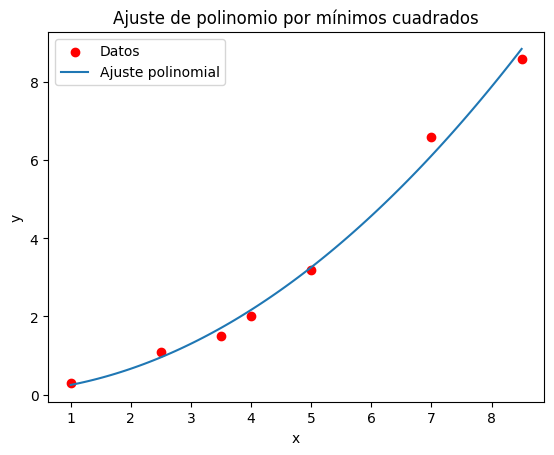

In [8]:
# 4.1)

x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

X = np.column_stack([np.ones_like(x), x, x**2])

c, residuals, rank, s = linalg.lstsq(X, y)
print("Coeficientes del polinomio ajustado:")
print(c)

# 4.2)

x_fit = np.linspace(min(x), max(x), 100)
y_fit = c[0] + c[1]*x_fit + c[2]*x_fit**2
plt.scatter(x, y, color='red', label='Datos') 
plt.plot(x_fit, y_fit, label='Ajuste polinomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste de polinomio por mínimos cuadrados')
plt.show()


## **Ejercicio 5)** pseudo-inversa de Moore-Penrose de una matriz

La pseudo-inversa de Moore-Penrose es una generalización de la noción de inversa, que resulta útil porque existe para cualquier matriz de dimensiones y entradas arbitrarias sobre los números reales o complejos.

Si una matriz $A$ es invertible (y por ende cuadrada), existe una matriz $B$ tal $AB=BA=\mathbb{I}$. Dicha matríz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^{-1}$ y se la denomina inversa de $A$.

Si $A$ no es invertible, luego no existe una matriz $B$ para la cual se cumpla la primera condición $AB=BA=\mathbb{I}$. Sin embargo, se puede ver que siempre existe una matriz $B$ para la cual se cumple:

- $ABA = A$,
- $BAB=B$,
- $AB$ es hermitiana, y
- $BA$ es hermitiana.

Dicha matriz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^+$ y se la denomina matríz pseudo-inversa de Moore-Penrose de $A$.

Referencias:

- https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv

**1)** Cree una matriz $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$ de números aleatorios generados a partir de la distribución normal de media 0 y varianza 1.

**2)** Use `linalg.pinv()` para computar la psuedo-inversa de Moore-Penrose $A^+$ de $A$.

**3)** Que dimensiones tiene $A^+$?

**4)** Use `np.allclose()` para verifique que $AA^+A\approx A$.

**5)** Verifique que $A^+AA^+\approx A^+$.


In [ ]:
# 5.1)

array([[0.70467157, 0.89963655, 0.89633987, 0.27809437, 0.30293966,
        0.26859824],
       [0.50131808, 0.56949881, 0.77703915, 0.34555527, 0.06280042,
        0.97711797],
       [0.63097482, 0.84680794, 0.11642053, 0.04727317, 0.31993979,
        0.9925807 ],
       [0.47870385, 0.45388909, 0.05283093, 0.20085294, 0.78173579,
        0.02819416],
       [0.51568243, 0.32783795, 0.57458418, 0.94538329, 0.9096426 ,
        0.3053777 ],
       [0.90847907, 0.71928637, 0.50660153, 0.63888327, 0.72846796,
        0.76359418],
       [0.26458122, 0.89751585, 0.33149466, 0.28815747, 0.07348233,
        0.97181263],
       [0.1833463 , 0.97843284, 0.41083342, 0.48050824, 0.87128068,
        0.74448606],
       [0.30637882, 0.03256264, 0.71371035, 0.53048382, 0.37263883,
        0.63766734]])

## **Ejercicio 6)** Producto de Kronecker

Considere las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
A*{11} & \dots & A*{1m} \\
\vdots & \ddots & \vdots \\
A*{nm} & \dots & A*{nm}
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
B*{11} & \dots & B*{1s} \\
\vdots & \ddots & \vdots \\
B*{r1} & \dots & B*{rs}
\end{array}
\right)
\end{equation}

El producto de Kronecker es la matriz de dimensiones $nr\times ms$ dada por

\begin{equation}
A\otimes B
=
\left(
\begin{array}{cc}
A*{11}B & \dots & A*{1m}B \\
\vdots & \ddots & \vdots \\
A*{n1}B & \dots & A*{nm}B
\end{array}
\right)
=
\left(
\begin{array}{cc}
B*{11}A & \dots & B*{1s}A \\
\vdots & \ddots & \vdots \\
B*{r1}A & \dots & B*{rs}A
\end{array}
\right)
\end{equation}

donde $A_{ij}B$ es un bloque de la matriz $A\otimes B$ igual al producto del escalar $A_{ij}$ por la matriz $B$.
Idem para $B_{ij}A$.

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.kron.html#scipy.linalg.kron

**1)** Use `linalg.kron()` para calcular el producto de Kronecker de las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 \\
1 \\
1 \\
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este caso?

**2)** Repita para las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 & 1 & 1
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este otro caso?


In [ ]:
# 6.1)

array([[1, 2],
       [3, 4]])

## **Ejercicio 7)** Autovalores y autovectores

Considere una matriz $A$ de $n\times m$. Luego, existen un conjunto de escalares $\{\lambda_1,...,\lambda_n\}$ y un correspondiente conjunto de vectores distintos $\{v_1,...,v_n\}$ tales que

\begin{eqnarray}
Av_i = \lambda_i v_i \;\;\;\; (1)
\end{eqnarray}

para todo $i\in\{1,...,n\}$. Estos $\lambda_i$ y $v_i$ se denominan autovalores y autovectores a derecha de $A$, respectivamente. Los autovalores pueden repetirse, pueden ser nulos y se los suele ordenar de mayor a menor en orden descendiente de sus valores absolutos: $|\lambda_1|\geq |\lambda_2|\geq ...\geq |\lambda_n|\geq 0$. Los autovectores pueden normalizarse, ya que si $v_i$ es autovector, luego $v_i/|v_i|$ también lo es.

Los autovectores constituyen una base del dominio de $A$. Esto es muy útil porque permite escribir cualquier vector $v$ en el dominio de $A$ como una combinación linal de sus autovectores

\begin{eqnarray}
v = \sum_i c_i v_i
\end{eqnarray}

Luego, calcular el producto de $A$ con $v$ resulta muy simple

\begin{eqnarray}
Av = A\left(\sum_i c_i v_i\right) = \sum_i c_iAv_i = \sum_i c_i\lambda_iv_i
\end{eqnarray}

Análogamente, existen un conjunto de escalares $\{\mu_1,...,\mu_m\}$ y un correspondiente conjunto de vectores diferentes $\{u_1,...,u_m\}$ de $A$, llamados autovalores y autovectores a izquierda de $A$, respectivamente, y son tales que

\begin{eqnarray}
u_jA = \mu_j u_j \;\;\;\; (2)
\end{eqnarray}

para todo $j\in\{1,...,m\}$.

**1)** Use `linalg.eigvals()` para calcular los autovalores a derecha de la matriz

\begin{equation}
A = \left(
\begin{array}{cc}
0 & -1 \\
1 & 0
\end{array}
\right)
\end{equation}

Referencias:

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig

**2)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a derecha de $A$.

**3)** Verifique que la ecuación $(1)$ se cumple.

**4)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a izquierda de $A$.

**5)** Verifique que la ecuación $(2)$ se cumple.


In [ ]:
# 7.1)

array([-0.37228132+0.j,  5.37228132+0.j])

## **Ejercicio 8)** Singular Value Decomposition (SVD)

Una matriz compleja $A$ de dimensiones $n\times m$ se la puede pensar como una transformación lineal $A:V\to W$ desde un espacio vectorial $V$ de dimensión $m$ a un espacio vectorial $W$ de dimensión $n$.
A $V$ se lo suele llamar espacio de salida y a $W$ espacio de llegada.

Cualquiera sea $A$, siempre existen matrices $L$, $D$ y $R$, de dimensiones $n\times n$, $n\times m$ y $m\times m$, respectivamente, tales que $L$ y $R$ son unitarias, $D$ es diagonal y

\begin{eqnarray}
A = LDR^{\dagger} \;\;\;\; (1)
\end{eqnarray}

Los valores diagonales

\begin{eqnarray}
\sigma*i := D*{ii}
\end{eqnarray}

están definidos para todo $i\in \{1,...,k\}$, donde $k=\min(n,m)$,
se los denomina valores singulares de $A$, son todos reales y no-negativos.
La descomposición siempre puede realizarse de manera tal que $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_k\geq 0$.
El número de valores singulares no nulos es el rango de $A$.

Los vectores columna $l_1,...,l_n$ de $L$ forman una base ortonormal del espacio vectorial de llegada $W$.
Los vectores columna $r_1,...,r_m$ de $R$ forman una base ortonormal del espacio vectorial de salida $V$.
Usando estas propiedades, la ecuación $(1)$ puede reescribirse como

\begin{eqnarray}
A = \sum\_{i=1}^k \sigma_i \, (l_i \otimes r_i^{\dagger}) \;\;\;\; (2)
\end{eqnarray}

donde $l_i \otimes r_i^{\dagger}$ es la matriz de dimensiones $n\times m$ resultante del [producto exterior](https://en.wikipedia.org/wiki/Outer_product#Connection_with_the_Kronecker_product) entre la matriz $l_i$ de dimensiones $n\times 1$ y la matriz $r_i^{\dagger}$ de dimensiones $1\times m$.
En otras palabras, la $jk$-esima entrada de la matriz $l_i \otimes r_i^{\dagger}$ es

\begin{eqnarray}
(l*i \otimes r_i^{\dagger})*{jk}
=
(l*i)*{j1}
(r*i^{\dagger})*{1k}
\end{eqnarray}

para cada $j\in \{1,...,n\}$ y $k \in \{1,...,m\}$, donde

\begin{eqnarray}
(r*i^{\dagger})*{1k}
=
(r*i)*{k1}^\*
\end{eqnarray}

i.e. es el complejo conjugado de la $k1$-esima entrada de la traspuesta de la matriz $r_i$.

Referencias:

- https://en.wikipedia.org/wiki/Singular_value_decomposition
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd

**1)** Cree una matriz compleja $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$, cuyas entradas $a_{ij} = x_{ij} + i y_{ij}$ se computen generando números aleatorios $x_{ij}$ e $y_{ij}$ a partir de una distribución normal de media 0 y varianza 1.

**2)** Use `linalg.svd()` para calcular la SVD de $A$. Dicha función retorna 3 arrays, digamos `L`, `s` y `Rc`, donde `L` denota a la matriz $L$, `s` denota al vector de valores singulares $(\sigma_1,\sigma_2,...,\sigma_k)$ y `Rc` denota a la matriz compleja conjugada $R^{\dagger}$.
Inspeccione las dimensiones de los arrays retornados.

**3)** Use el vector `s` para crear la matriz diagonal $D$ de dimensiones $n\times m$.

**4)** Use `np.allclose()` para verificar numéricamente la ecuación $(1)$.


In [ ]:
# 8.1)